Best Parameters: {'dt__max_depth': 8, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}
R2 Score: 0.6812322392481562
Mean Squared Error: 0.4177161356629632


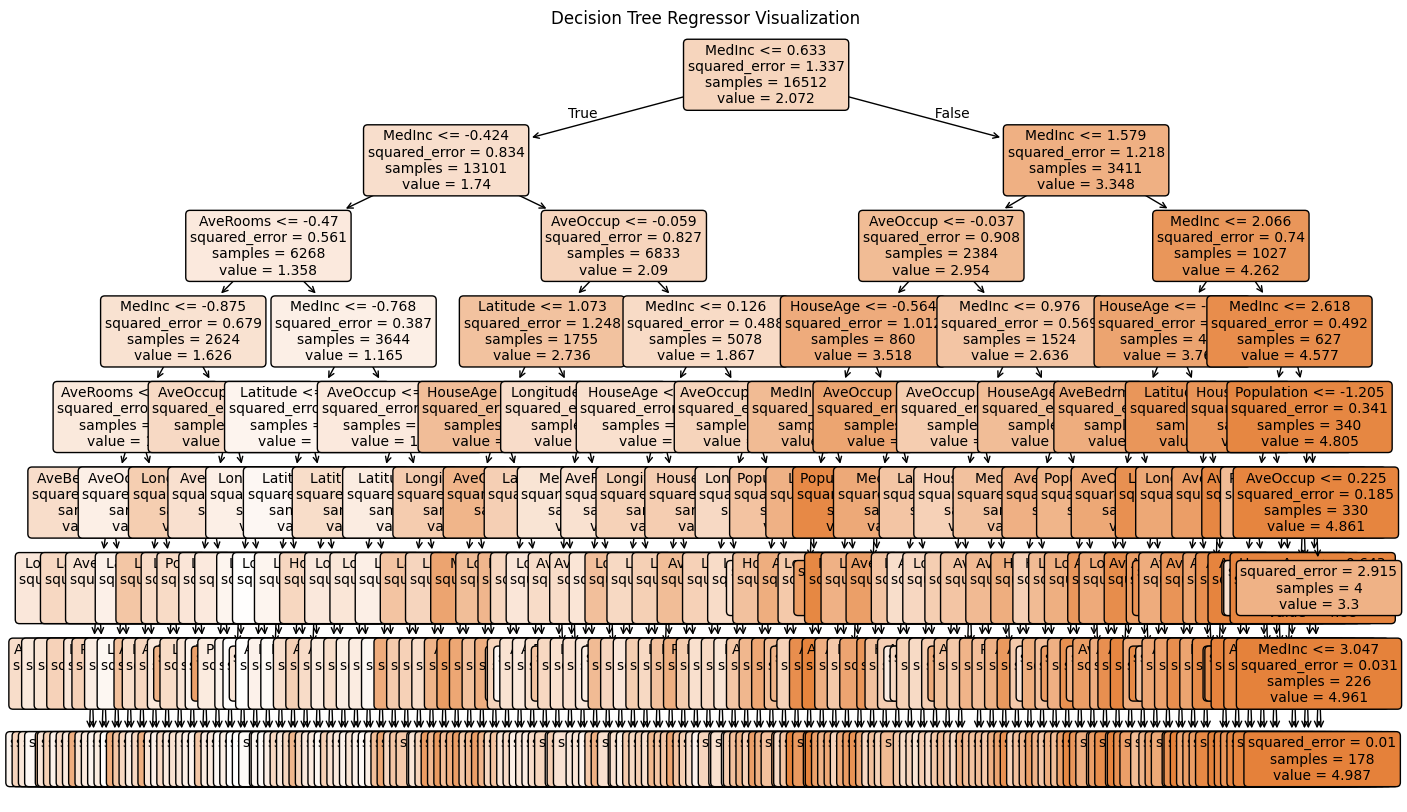

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2️⃣ Load Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for tree-based models
    ('dt', DecisionTreeRegressor(random_state=42))
])

# 5️⃣ Hyperparameter Tuning
param_grid = {
    'dt__max_depth': [2, 4, 6, 8, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 6️⃣ Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 7️⃣ Visualize Decision Tree
plt.figure(figsize=(16,10))
plot_tree(best_model.named_steps['dt'], feature_names=data.feature_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor Visualization")
plt.show()
